In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

### Iremos trabalhar com apenas escalas de cinza para diminuir o custo
- alterar o formato do array de imagens para escala de cinza
- reshape(numLinhas, tamanho em pixel altura, tamanho em pixel largura, numero de canais)

In [3]:
previsores_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 28, 28, 1)

In [4]:
previsores_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)

### Setar o tipo das imagens, aumentando para float 32

In [5]:
previsores_treinamento = previsores_treinamento.astype('float32')

In [6]:
previsores_teste = previsores_teste.astype('float32')

### Reduzir a escala dos valores dos pixel
- escala de 0 a 1
- divisao por 255

In [7]:
previsores_treinamento /= 255

In [8]:
previsores_teste /= 255

### Transformação dos valores das classes para valores categoricos

In [10]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)

In [11]:
classe_teste  = np_utils.to_categorical(y_teste, 10)

### Estrutura da Rede Neural

In [12]:
classificador = Sequential()
#primeira camada de convolução
classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
#segunda camada de convolução
classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
#Flatten para transformar a matriz num vetor
classificador.add(Flatten())


classificador.add(Dense(units=128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=10, activation='softmax'))
classificador.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size=128, epochs=10, validation_data = (previsores_teste, classe_teste), use_multiprocessing=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.2266 - accuracy: 0.9309 - val_loss: 0.1365 - val_accuracy: 0.9580
Epoch 2/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0647 - accuracy: 0.9809 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 3/10
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 233s 4ms/step - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.0400 - val_accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0453 - val_accuracy: 0.9863
Epoch 7/10
60000/60000 [==============================] - 234s

#### Seleção de uma imagem para ser classificada

In [15]:
imagem_teste = x_teste[8].reshape(1, 28, 28, 1)
imagem_teste = imagem_teste.astype('float32')
imagem_teste /= 255

Text(0.5, 1.0, 'Classe 5')

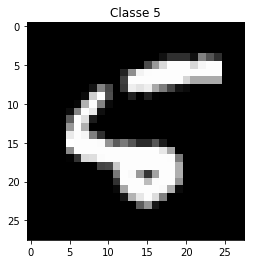

In [16]:
plt.imshow(x_teste[8], cmap='gray')
plt.title('Classe ' + str(y_teste[8]))

In [18]:
import numpy as np
previsao = classificador.predict(imagem_teste)
resultado = np.argmax(previsao)

In [19]:
resultado

5